In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
b = bytearray([123])
b * 10

bytearray(b'{{{{{{{{{{')

In [11]:
sizes = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
b = bytearray([123])

for s in sizes:
    f = open(f'file_{s}', 'wb')
    f.write(b * s)
    f.close()

In [12]:
import os

path = '../cmake-build-debug/file_reading_analysis'
def run(type, size):
    os.system(f'{path} -m {type} -b 1024 -i file_{size} -o report.csv -v -r 10')

In [13]:
for m in ['mmap', 'read', 'ifstream']:
    for s in sizes:
        run(m, s)

Method: mmap
	Size: 1
	Time: 15.422
	123 1
Method: mmap
	Size: 1
	Time: 8.57
	123 2
Method: mmap
	Size: 1
	Time: 6.409
	123 3
Method: mmap
	Size: 1
	Time: 6.324
	123 4
Method: mmap
	Size: 1
	Time: 6.311
	123 5
Method: mmap
	Size: 1
	Time: 5.827
	123 6
Method: mmap
	Size: 1
	Time: 7.424
	123 7
Method: mmap
	Size: 1
	Time: 6.291
	123 8
Method: mmap
	Size: 1
	Time: 6.281
	123 9
Method: mmap
	Size: 1
	Time: 8.449
	123 10
Method: mmap
	Size: 10
	Time: 16.306
	123 10
Method: mmap
	Size: 10
	Time: 7.079
	123 20
Method: mmap
	Size: 10
	Time: 5.483
	123 30
Method: mmap
	Size: 10
	Time: 5.545
	123 40
Method: mmap
	Size: 10
	Time: 6.5
	123 50
Method: mmap
	Size: 10
	Time: 6.034
	123 60
Method: mmap
	Size: 10
	Time: 5.191
	123 70
Method: mmap
	Size: 10
	Time: 5.057
	123 80
Method: mmap
	Size: 10
	Time: 5.099
	123 90
Method: mmap
	Size: 10
	Time: 4.9
	123 100
Method: mmap
	Size: 100
	Time: 22.533
	123 100
Method: mmap
	Size: 100
	Time: 8.82
	123 200
Method: mmap
	Size: 100
	Time: 7.493
	123 300
Met

In [14]:
df = pd.read_csv('report.csv')
df

,method,duration,size
0,mmap,15.422,1
1,mmap,8.570,1
2,mmap,6.409,1
3,mmap,6.324,1
4,mmap,6.311,1
...,...,...,...
265,ifstream,330845.000,100000000
266,ifstream,329972.000,100000000
267,ifstream,330534.000,100000000
268,ifstream,338586.000,100000000


In [15]:
maxs = df.groupby('size')['duration'].transform('max')
df = df[~(df['duration'] == maxs)]
df

,method,duration,size
0,mmap,15.422,1
1,mmap,8.570,1
2,mmap,6.409,1
3,mmap,6.324,1
4,mmap,6.311,1
...,...,...,...
264,ifstream,330143.000,100000000
265,ifstream,330845.000,100000000
266,ifstream,329972.000,100000000
267,ifstream,330534.000,100000000


Text(0.5, 0, 'Size, b')

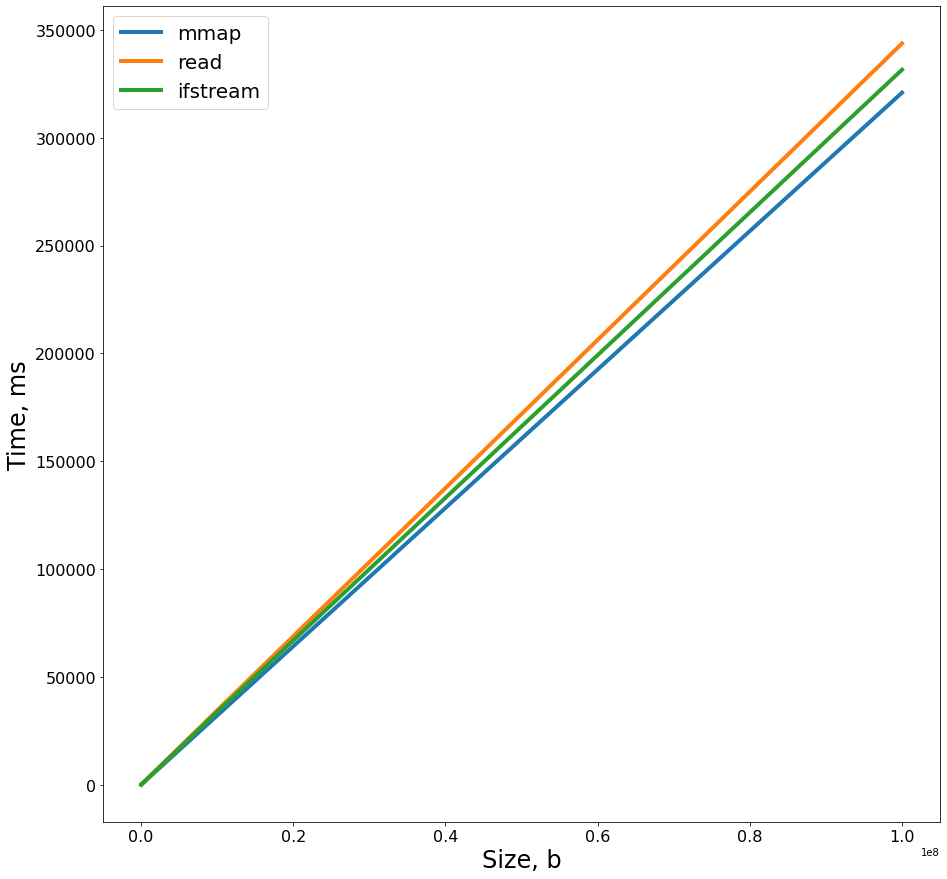

In [16]:
ax = df[df['method'] == 'mmap'].groupby('size').mean().plot(y='duration', figsize=(15,15), fontsize=16, lw=4)
ax = df[df['method'] == 'read'].groupby('size').mean().plot(y='duration', ax=ax, figsize=(15,15), fontsize=16, lw=4)
ax = df[df['method'] == 'ifstream'].groupby('size').mean().plot(y='duration', ax=ax, figsize=(15,15), fontsize=16, lw=4)
ax.legend(['mmap', 'read', 'ifstream'], fontsize=20)
ax.set_ylabel('Time, ms', fontdict={'fontsize':24})
ax.set_xlabel('Size, b', fontdict={'fontsize':24})    